# Análisis de datos - FIFA

In [ ]:
#@title Información general del grupo
Grupo = "WebData Warriors" #@param {type:"string"}
Integrantes = "Juan Felipe Najera, Irene Reynoso, Mary Isabel Martinez, Matias Campos" #@param {type:"string"}
Datos = "Partidos de la FIFA" #@param {type:"string"}
Fecha = "2023-08-12" #@param {type:"date"}

## Introducción del proyecto

En la era actual, el fútbol trasciende más allá de ser simplemente un deporte, es un reflejo de cultura, una manifestación de pasión y un campo importante para el análisis detallado. Con la ayuda de la tecnología y la ciencia de datos, podemos explorar este deporte con un enfoque analítico, identificando patrones y tendencias que anteriormente eran difíciles de discernir. El objetivo es analizar enfrentamientos futbolísticos entre selecciones nacionales desde 1993. Nuestra base de datos ofrece no solo los resultados de los partidos, sino también una profunda información contextual que permitirá comprender mejor el juego y las dinámicas entre los diferentes equipos y torneos. Mediante este análisis, aspiramos a descubrir insights valiosos sobre el fútbol internacional y brindar una perspectiva única sobre los factores que determinan el éxito en el campo.

### Objetivo principal

Analizar y entender los factores determinantes en los resultados de los partidos de fútbol entre selecciones nacionales, utilizando datos históricos desde 1993 y evaluando su relación con variables como el ranking FIFA, la localización del juego, roles específicos de los jugadores, entre otros.

### Objetivos secundarios

1. **Descubrir información en los datos:** Con el dataset principal, se realiza un análisis general de los datos a través de gráficos y visualizaciones.  

2. **Desarrollar un modelo predictivo:** Evaluar si, mediante el análisis de datos, podemos construir un modelo que prediga con mayor precisión el resultado de un partido en comparación con las predicciones basadas únicamente en el ranking FIFA.

3. **Evaluación de la precisión del ranking FIFA:** Estudiar la precisión del ranking FIFA al predecir el resultado de los partidos a lo largo del tiempo, con un enfoque particular en los últimos 10 años.

4. **Evaluación de la ventaja del equipo local:** Investigar la existencia y magnitud de la ventaja que puede tener un equipo al jugar en su propio país o continente, y cómo esta ventaja se manifiesta en diferentes torneos.

5. **Influencia del portero en rondas de penaltis:** Estudiar la contribución y efectividad de los porteros durante las rondas de penaltis y determinar cuánto impactan en el resultado final de dichas rondas.

##Inicialización y vista previa

### Librerías

Instalación de librería

In [ ]:
pip install missingno

Se inicia cargando todas las librerías de python que se utilizarán a lo largo del archivo.

In [1]:
# importar librerias
import pandas as pd
import numpy as np
import statistics as statistics
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import json

from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [4]:
# visualización para mostrar todas las columnas
pd.set_option('display.max_columns', None)

### Cargar los datos

Se carga los datos de los diferentes archivos.

In [3]:
# cargar los datos - Juanfe
fifa = pd.read_csv("/content/drive/MyDrive/WebData Warriors - Hackaton Deportivo/Data FIFA/international_matches.csv")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# cargar los datos - Irene
fifa = pd.read_csv('https://raw.githubusercontent.com/IreneRA/Hackaton-Tripleten/Raw-data/international_matches.csv')

### Estudio general de la información

Comenzamos a revisar el contenido de los archivos

In [5]:
# imprimir nombres columnas y número filas x columnas x archivo
print("Fifa columns:", fifa.columns)
print("Fifa rows and columns:", fifa.shape)

Fifa columns: Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')
Fifa rows and columns: (23921, 25)


En el dataset `fifa` se tiene un total de 25 columnas y 23,921 filas.

Se comprueba los primeros 10 datos del dataset:

In [6]:
# vista previa
fifa.head(5)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ahora la información general del dataframe:

In [7]:
#información general
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

Descripción de los datos de `fifa`:
-  `date`: fecha en que se llevó a cabo el partido.
-  `home_team`: equipo local o equipo que juega en casa.
-  `away_team`: equipo visitante.
-  `home_team_continent`: continente al que pertenece el equipo local.
-  `away_team_continent`: continente al que pertenece el equipo visitante.
-  `home_team_fifa_rank`: clasificación FIFA del equipo local en el momento del partido.
-  `away_team_fifa_rank`: clasificación FIFA del equipo visitante en el momento del partido.
-  `home_team_total_fifa_points`: puntos totales FIFA del equipo local en el momento del partido.
-  `away_team_total_fifa_points`: puntos totales FIFA del equipo visitante en el momento del partido.
-  `home_team_score`: goles anotados por el equipo local durante el partido.
-  `away_team_score`: goles anotados por el equipo visitante durante el partido.
-  `tournament`: torneo o competición en el que se lleva a cabo el partido.
-  `city`: ciudad en la que se realizó el partido.
-  `country`: país en el que se realizó el partido.
-  `neutral_location`: booleano (True/False) que indica si el partido se llevó a cabo en una ubicación neutral (es decir, no es el hogar de ninguno de los equipos).
-  `shoot_out`: indica si hubo una tanda de penaltis ("Sí" o "No").
-  `home_team_result`: resultado del equipo local (puede ser "Ganar", "Empatar" o "Perder").
-  `home_team_goalkeeper_score`: calificación del portero del equipo local.
-  `away_team_goalkeeper_score`: calificación del portero del equipo visitante.
-  `home_team_mean_defense_score`: calificación media de la defensa del equipo local.
-  `home_team_mean_offense_score`: calificación media del ataque del equipo local.
-  `home_team_mean_midfield_score`: calificación media del mediocampo del equipo local.
-  `away_team_mean_defense_score`: calificación media de la defensa del equipo visitante.
-  `away_team_mean_offense_score`: calificación media del ataque del equipo visitante.
-  `away_team_mean_midfield_score`: calificación media del mediocampo del equipo visitante.

La columna `date` tiene el tipo de dato incorrecto.

Y al parecer hay datos ausentes en las siguientes columnas:
- `home_team_goalkeeper_score`
- `away_team_goalkeeper_score`
- `home_team_mean_defense_score`
- `home_team_mean_offense_score`
- `home_team_mean_midfield_score`
- `away_team_mean_defense_score`
- `away_team_mean_offense_score`
- `away_team_mean_midfield_score`



### Análisis valores ausentes

Se analizará la información de los valores ausentes que se tienen en el dataset. Lo importante a recalcar aquí, es que los valores ausentes presentes puede ser porque no había esa información en esa época.

In [8]:
# número de valores ausentes por columna
fifa.isna().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

Se puede observar que las columnas que hay valores ausentes son justo las variables donde se da una calificación a los jugadores en cada partido. En este caso hay valores ausentes entre 15,411 datos a 16,357 datos por columna.

Veamos el porcentaje de valores ausentes en cada columna:

In [9]:
# % de missing values por columna
for col in fifa.columns:
    pct_missing = np.mean(fifa[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 2)))

date - 0.0%
home_team - 0.0%
away_team - 0.0%
home_team_continent - 0.0%
away_team_continent - 0.0%
home_team_fifa_rank - 0.0%
away_team_fifa_rank - 0.0%
home_team_total_fifa_points - 0.0%
away_team_total_fifa_points - 0.0%
home_team_score - 0.0%
away_team_score - 0.0%
tournament - 0.0%
city - 0.0%
country - 0.0%
neutral_location - 0.0%
shoot_out - 0.0%
home_team_result - 0.0%
home_team_goalkeeper_score - 64.97%
away_team_goalkeeper_score - 66.16%
home_team_mean_defense_score - 67.45%
home_team_mean_offense_score - 64.42%
home_team_mean_midfield_score - 65.88%
away_team_mean_defense_score - 68.38%
away_team_mean_offense_score - 65.25%
away_team_mean_midfield_score - 66.64%


La mayoría de columnas con valores ausentes tienen entre 64% a 68%. Habrá que analizar cómo utilizar estos datos en la información que se tiene, y en qué filas no se tendrá en cuenta.

Visualicemos los valores ausentes a nivel general y cómo están distribuidos.

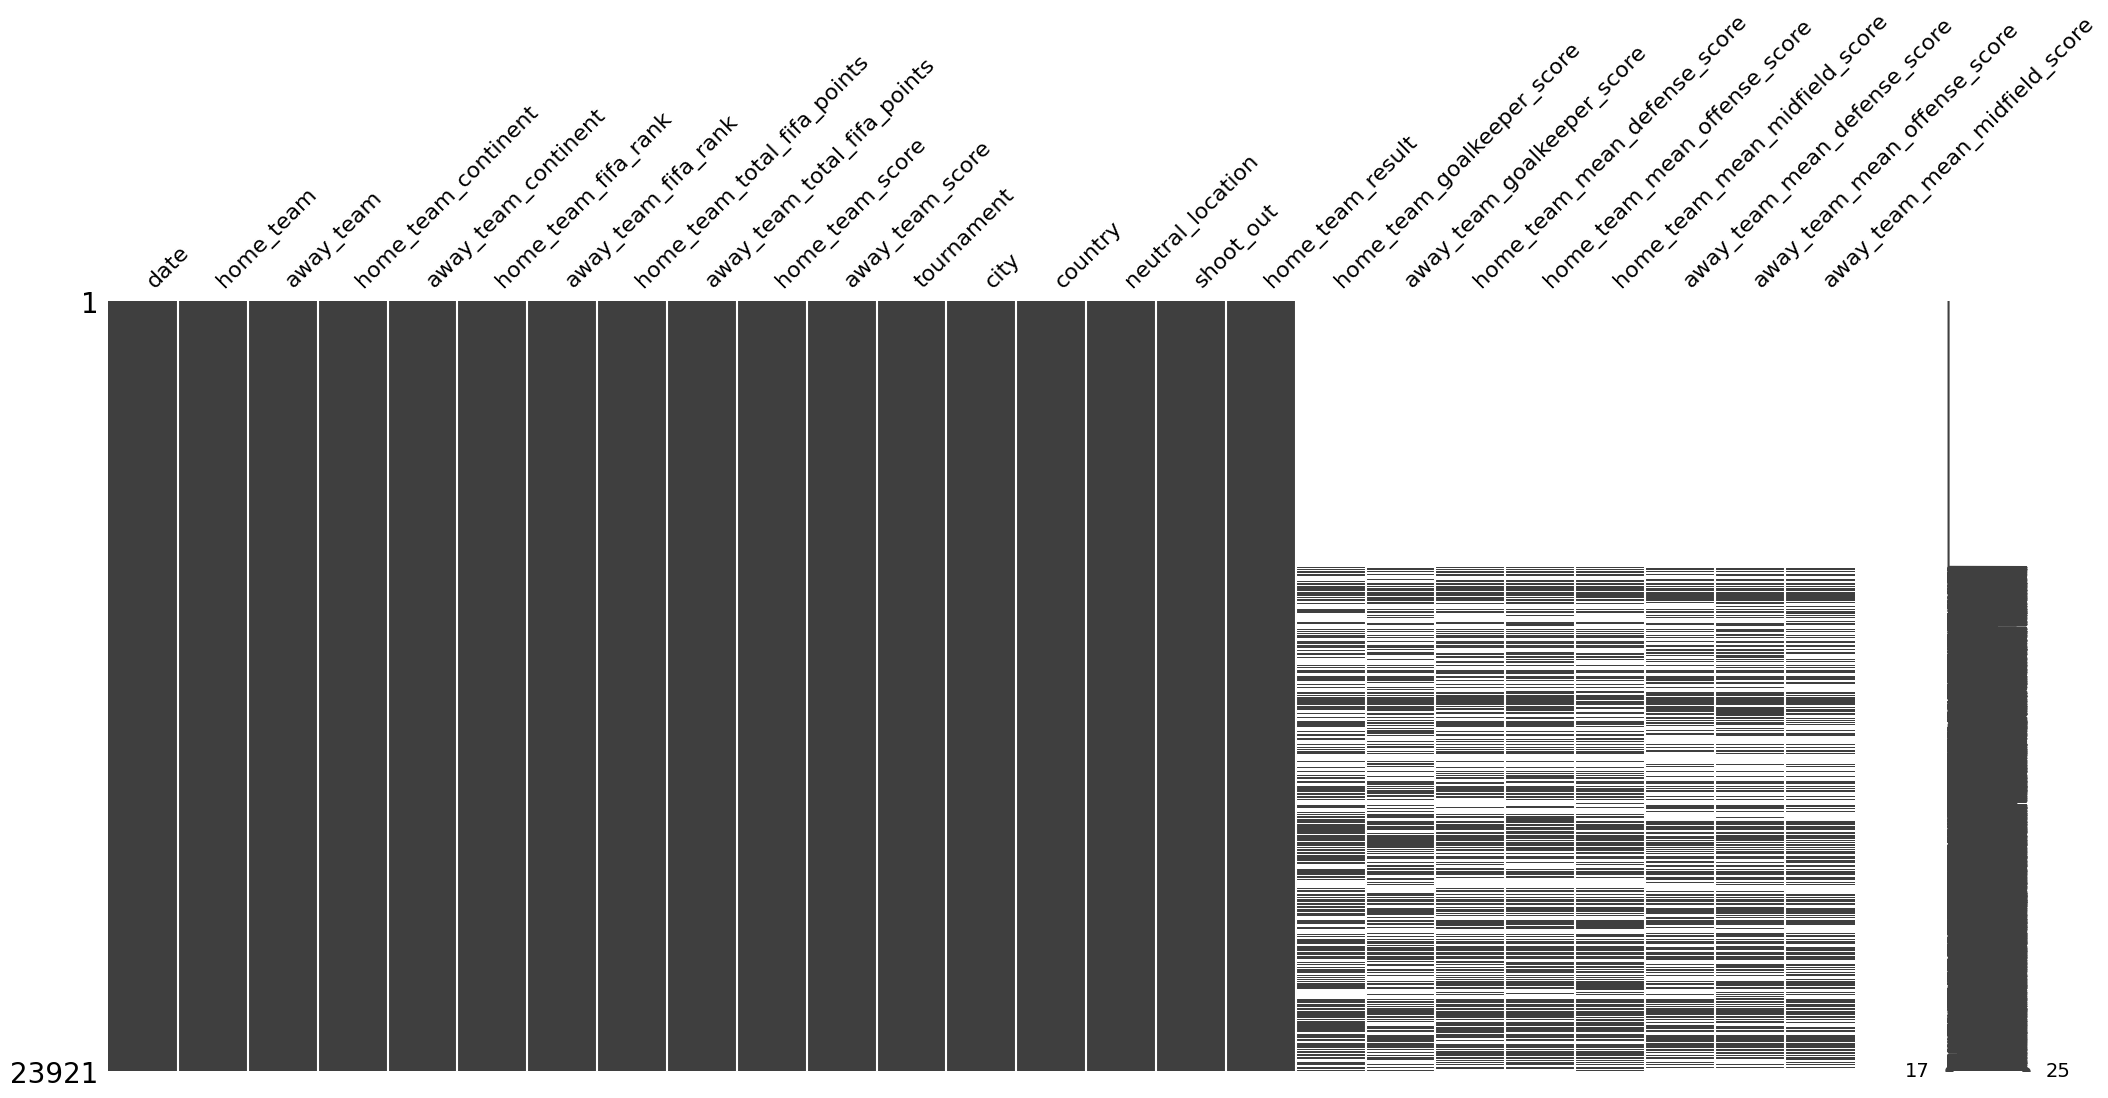

In [10]:
# matrix de visualización de valores ausentes
msno.matrix(fifa)
plt.show()

Ahora comprobemos si alguna fila coincide los valores ausentes con otra columna.

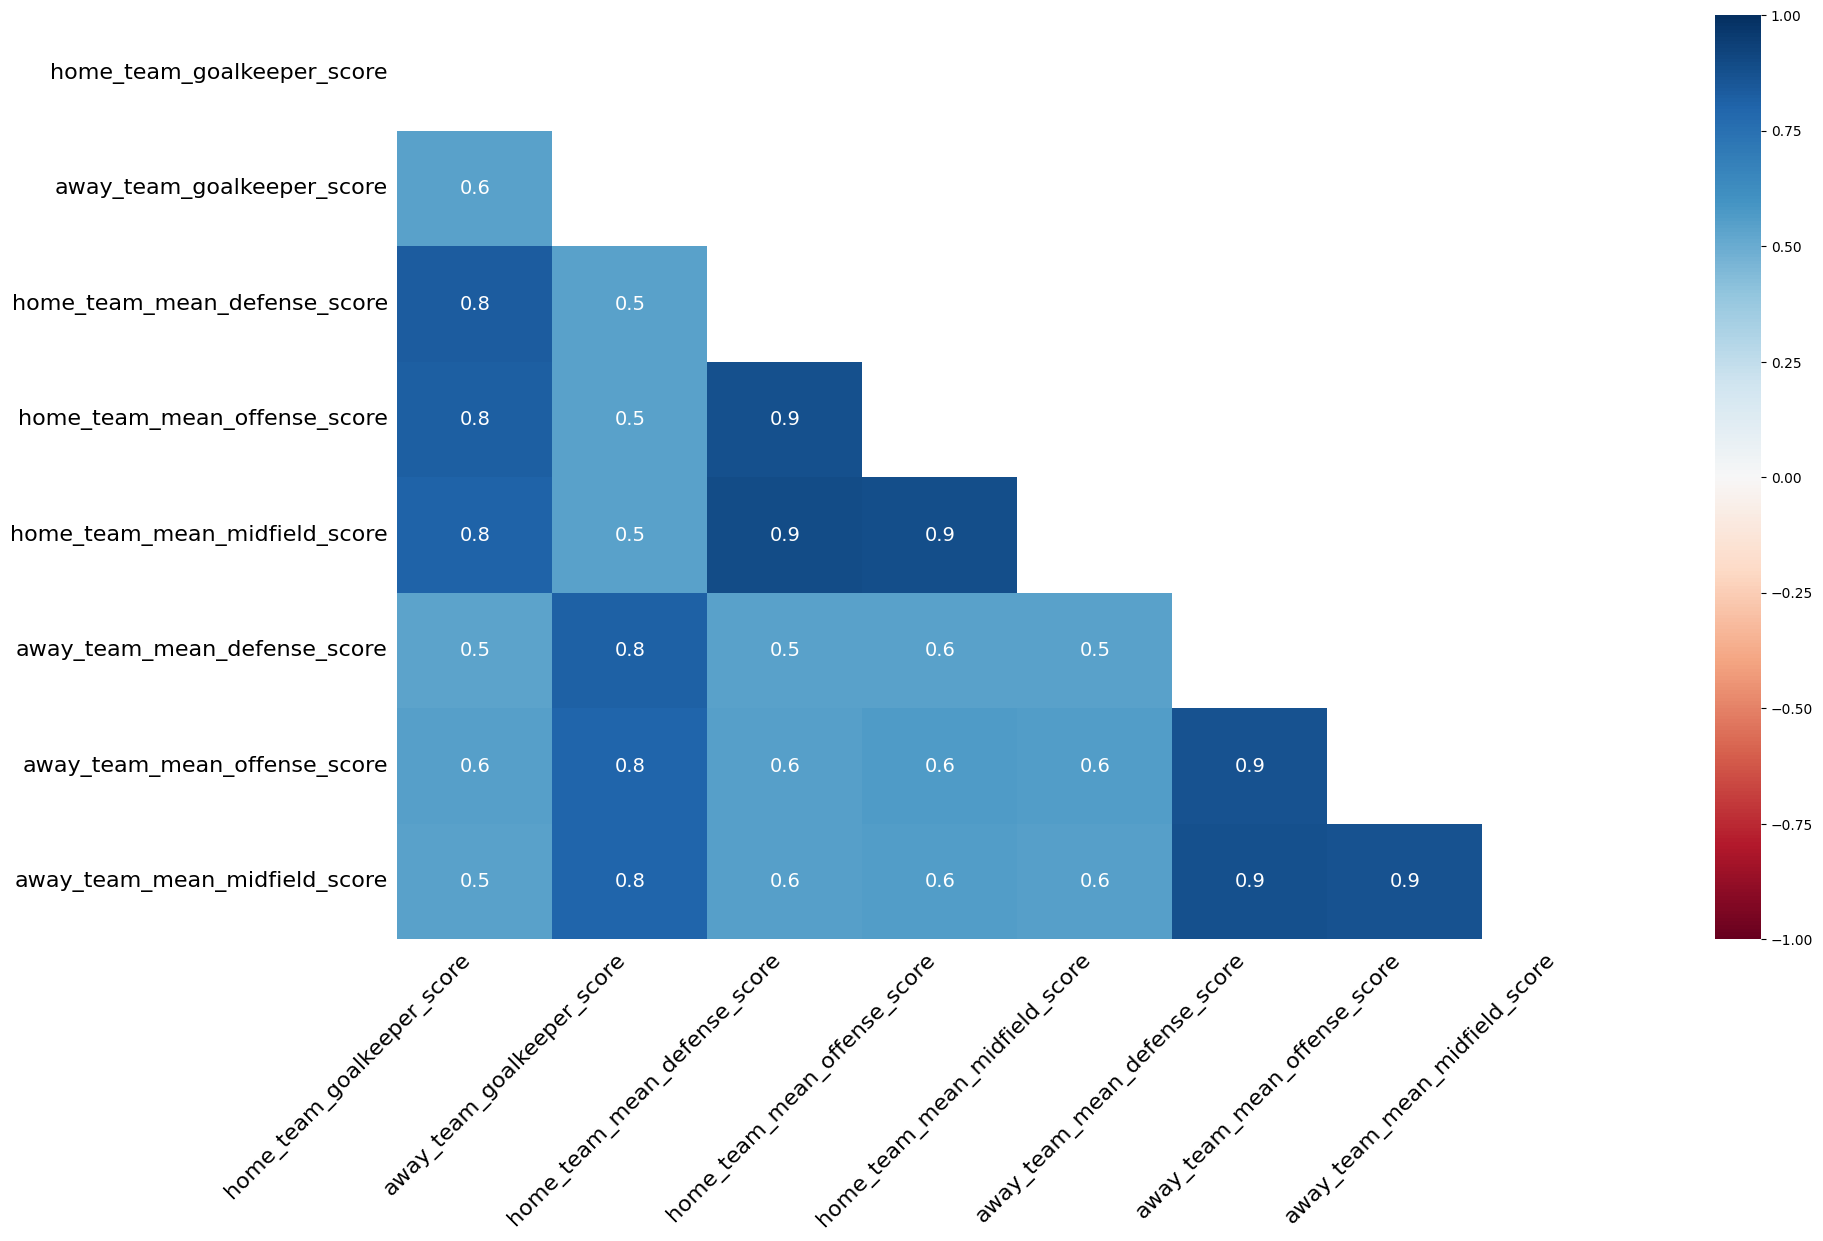

In [11]:
# heatmap de coincidencia de valores ausentes entre columnas
msno.heatmap(fifa)
plt.show()

La mayoría de columnas tienen una correlación de valores ausentes entre 0.6 a 0.9. Lo importante es analizar la información donde haya todos los datos.

Tomando en cuenta que los valores ausentes son solo de las variables que es la calificación de los jugadores, se podría indicar que hay valores ausentes porque no se recopilaba ese dato en años pasados.

Por lo tanto, es mejor mantenerlo como valores ausentes.

## Preprocesamiento de datos

### Conversión tipos de datos

Procederemos a transformar los tipo de datos de las siguientes columnas:
- `date` a datetime
- `tournament` a category
- `home_team` a category
- `away_team` a category

In [12]:
# convertir la columna 'date' a datetime
fifa['date'] = pd.to_datetime(fifa['date'])

# creación nueva columna año
fifa['year'] = fifa['date'].dt.year

In [13]:
# convertir columns 'tournament', 'home_team', y 'away_team' a tipo categórico
fifa['tournament'] = fifa['tournament'].astype('category')
fifa['home_team'] = fifa['home_team'].astype('category')
fifa['away_team'] = fifa['away_team'].astype('category')

Verifiquemos los cambios realizados

In [14]:
# información general
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           23921 non-null  datetime64[ns]
 1   home_team                      23921 non-null  category      
 2   away_team                      23921 non-null  category      
 3   home_team_continent            23921 non-null  object        
 4   away_team_continent            23921 non-null  object        
 5   home_team_fifa_rank            23921 non-null  int64         
 6   away_team_fifa_rank            23921 non-null  int64         
 7   home_team_total_fifa_points    23921 non-null  int64         
 8   away_team_total_fifa_points    23921 non-null  int64         
 9   home_team_score                23921 non-null  int64         
 10  away_team_score                23921 non-null  int64         
 11  tournament     

### Valores duplicados

Verifiquemos si hay valores duplicados en el dataset:

In [15]:
# verificación duplicados
fifa.duplicated().any()

False

No se tiene ningún valor duplicado, por lo que se puede continuar con el análisis de los datos

### Distribución de datos

Ahora que tenemos la información más limpia, podemos analizar los datos que hay en cada columna, viendo los 20 datos que se repiten más.

In [16]:
# distribución de datos por columna
for column in fifa.columns:
    print(f"\nDistribución para la columna: {column}")
    print("-" * 50)

    # 20 valores más comunes y su conteo
    top_20_values = fifa[column].value_counts().head(20)
    print(top_20_values)
    print("\n")


Distribución para la columna: date
--------------------------------------------------
2012-02-29    66
2016-03-29    59
2008-03-26    59
2014-03-05    57
2022-03-29    55
2012-11-14    55
2011-10-11    54
2011-11-11    54
2011-11-15    53
2011-09-02    52
2011-09-06    52
2008-10-11    51
2010-08-11    51
2008-08-20    50
2012-10-16    50
2013-02-06    50
2013-10-15    50
2019-09-10    50
2012-09-11    49
2009-08-12    49
Name: date, dtype: int64



Distribución para la columna: home_team
--------------------------------------------------
Mexico                  316
USA                     314
Japan                   280
Saudi Arabia            272
Qatar                   249
Korea Republic          249
Oman                    241
United Arab Emirates    239
Brazil                  233
South Africa            229
Egypt                   227
Bahrain                 226
Thailand                225
France                  221
Germany                 219
Kuwait                  212
China 

Analicemos la información en base a los resultados:

- **Fecha** (`date`): las fechas con más partidos parecen estar alrededor de fechas específicas, posiblemente días de eliminatorias o fechas FIFA. La fecha con más partidos es el 29 de febrero de 2012, seguida por el 29 de marzo de 2016 y el 26 de marzo de 2008.

- **Equipo local** (`home_team`): México es el equipo local con más partidos, con 316 apariciones, seguido de cerca por EE.UU. con 314, y luego Japón con 280. Países como Arabia Saudita, Qatar y la República de Corea también han albergado una gran cantidad de partidos.

- **Equipo visitante** (`away_team`): Zambia ha sido el equipo visitante en más ocasiones, con 243 apariciones. Otros equipos frecuentes en la posición visitante incluyen a Costa Rica, Paraguay y Suecia.

- **Continente del equipo local (`home_team_continent`) y Continente del equipo visitante (`away_team_continent`):** Europa es el continente con más equipos jugando en casa y también en calidad de visitante. África y Asia siguen en términos de representación. Oceania tiene la menor cantidad de apariciones tanto para equipos locales como visitantes.

- **Ranking FIFA del equipo local (`home_team_fifa_rank`) y Ranking FIFA del equipo visitante (`away_team_fifa_rank`):** hay una variedad en los rankings, con una distribución similar entre los equipos locales y visitantes. Para los equipos locales, el ranking 22 es el más común, mientras que para los equipos visitantes, es el ranking 1.

- **Puntos FIFA totales del equipo local (`home_team_total_fifa_points`):** es notable que una gran proporción de equipos locales tiene 0 puntos FIFA, con un total de 14,290 equipos. Esto podría deberse a que hay muchos equipos que aún no han acumulado puntos.

- **Puntos FIFA totales del equipo visitante (`away_team_total_fifa_points`):** una gran proporción de los equipos visitantes tienen 0 puntos FIFA, con un total de 14,288 equipos. De igual forma puede ser porque no han acumulado puntos.

- **Goles marcados por el equipo local y visitante (`home_team_score & away_team_score`):** el resultado más común para los equipos locales es 1 gol, y para los equipos visitantes es 0 goles. Esto indica que los equipos locales tienden a desempeñarse ligeramente mejor en promedio.

- **Torneo (`tournament`):** la mayoría de los partidos son amistosos, seguidos por los juegos de clasificación para la Copa del Mundo de la FIFA.

- **Ciudad (`city`):** Doha ha sido la ciudad anfitriona de la mayoría de los partidos, seguida por Bangkok y Muscat. Esto podría indicar lugares populares o regiones con federaciones de fútbol activas.

- **País (`country`):** EE. UU. ha sido el anfitrión de la mayoría de los partidos, lo cual es interesante considerando que el fútbol no es el deporte más popular allí.

- **Ubicación_neutral (`neutral_location`)**: una gran mayoría de los partidos no se juegan en una ubicación neutral. Esto sugiere que la mayoría de los juegos aprovechan el formato de local y visitante.

- **Tanda_de_penaltis (`shoot_out`)**: las tandas de penaltis son raras, con solo 332 ocurrencias en más de 23,000 partidos. Esto también depende del tipo de campeonato que se da, ya que en partidos amistosos, los penaltis no se desarrollan.

- **Resultado_equipo_local (`home_team_result`)**: los equipos locales ganan casi el doble de partidos que pierden, reforzando la ventaja de jugar en casa.

- **Puntuación_portero_equipo_local y puntuación_portero_equipo_visitante:** las puntuaciones de los porteros tienden a agruparse alrededor de los mediados de los 70. Esto podría ser una calificación promedio para los porteros en FIFA. No hay mucha diferencia entre las puntuaciones de los porteros de los equipos locales y visitantes.

- **Puntuación_defensa_equipo_local, puntuación_ataque_equipo_local & puntuación_centrocampistas_equipo_local**: todas estas puntuaciones parecen promediar alrededor de mediados de los 70. Sería interesante ver la correlación entre estas puntuaciones y los resultados de los partidos.

- **Puntuación_defensa_equipo_visitante, puntuación_ataque_equipo_visitante & puntuación_centrocampistas_equipo_visitante:** al igual que las puntuaciones del equipo local, estas métricas también rondan los mediados de los 70.

- **Año:** Los años 2021 y 2019 tienen el mayor número de partidos, lo que podría deberse a un mayor número de torneos o a la participación de más equipos.

Adicional, luego de analizar la distribución general de los datos que más se repiten, se pudo observar de forma rápida que no hay datos escritos de forma errónea o datos duplicados implícitos.

## Análisis general de datos

### Visualización de datos

#### Partidos por continente

Procedamos con una visualización de los datos:

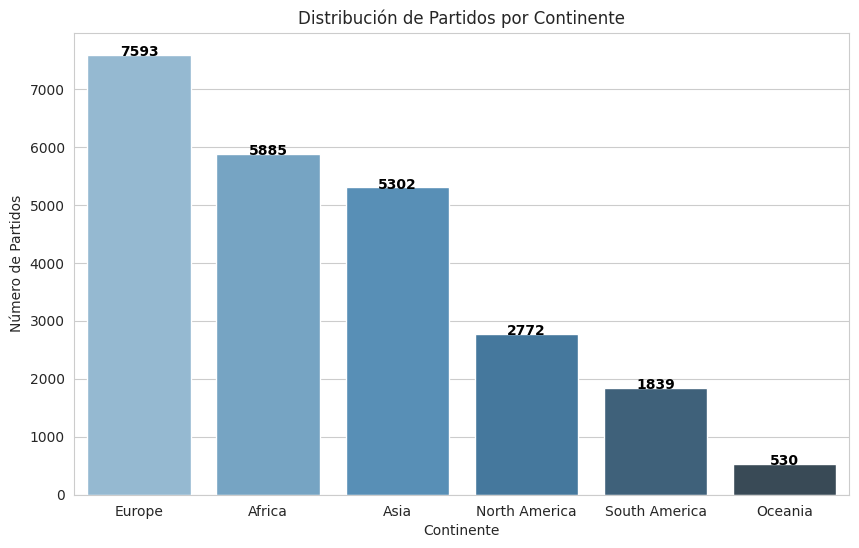

In [17]:
# configuración de estilo
sns.set_style("whitegrid")

# conteo de partidos por continente
continent_dist = fifa['home_team_continent'].value_counts().reset_index()
continent_dist.columns = ['Continente', 'Número de Partidos']

# gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Continente', y='Número de Partidos', data=continent_dist, palette="Blues_d")

# valores encima de las barras
for index, value in enumerate(continent_dist['Número de Partidos']):
    barplot.text(index, value + 50, str(value), ha="center", va="center", fontweight='bold', color='black')  # Ajusta el valor "50" según tus necesidades

plt.title('Distribución de Partidos por Continente')
plt.xlabel('Continente')
plt.ylabel('Número de Partidos')
plt.show()

Como se pudo comprobar anteriormente, la mayoría de partidos se dan en Europa, después África, Asia, Norte América, Sur América y finalmente Oceania, el cual es el continente con menos equipos de fútbol.

Podemos observar igual la distribución en porcentajes:

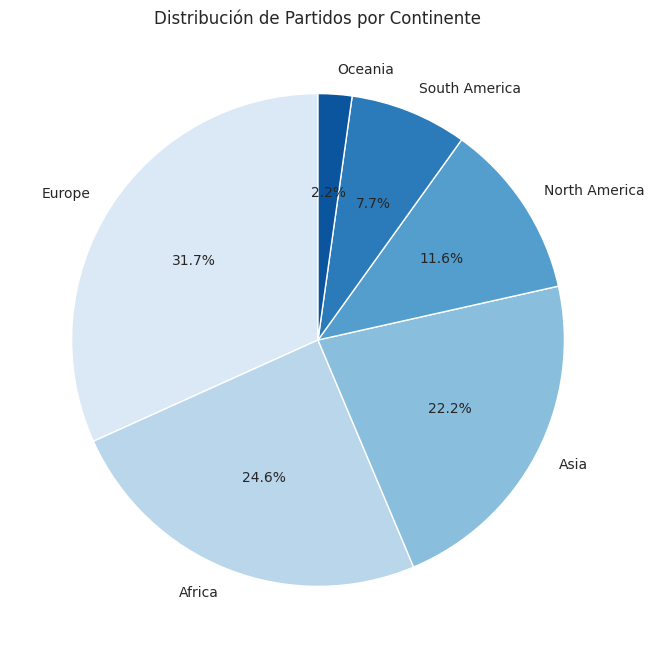

In [18]:
# gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(continent_dist['Número de Partidos'], labels=continent_dist['Continente'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Blues", len(continent_dist)))
plt.title('Distribución de Partidos por Continente')
plt.show()

Europa y África engloban más del 50% de los datos.

#### Número de equipos por continente

Visualicemos el número total de equipos únicos por continente.

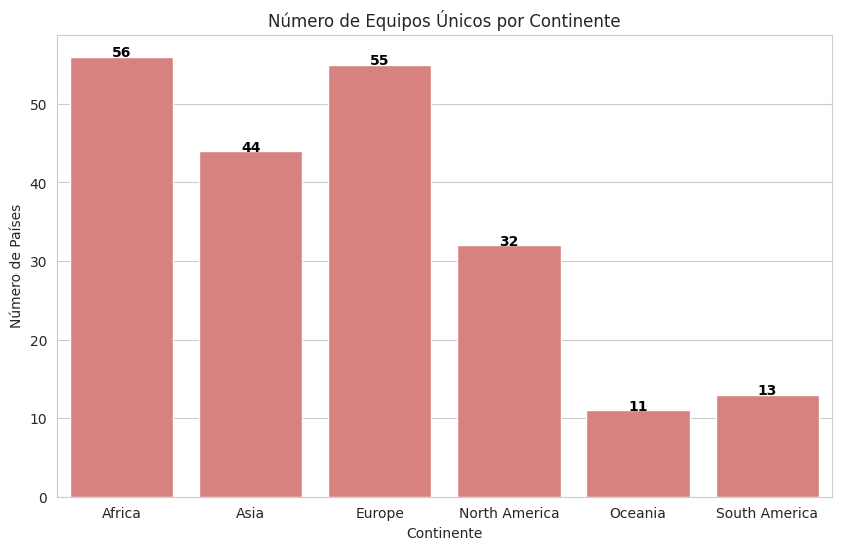

In [19]:
# configuración de estilo
sns.set_style("whitegrid")

# creación del conteo de equipos únicos por continente
country_continent_count = fifa.groupby('home_team_continent')['home_team'].nunique().reset_index()
country_continent_count.columns = ['Continente', 'Número de Países']

# gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Continente', y='Número de Países', data=country_continent_count, color="#E57373")  # Usando un rojo suave

# valores encima de las barras
for index, value in enumerate(country_continent_count['Número de Países']):
    barplot.text(index, value + 0.5, str(value), ha="center", va="center", fontweight='bold', color='black')  # Ajusta el valor "0.5" según tus necesidades

plt.title('Número de Equipos Únicos por Continente')
plt.xlabel('Continente')
plt.ylabel('Número de Países')
plt.show()

Se observa que África y Europa son los continentes con más páises. De ahí Asia, Norte América, Sur América y Oceania.

Procedemos a guardar la información en .json para extraer y construir a la página web.

In [20]:
# diccionario para almacenar información
continent_detail = {}

# rellenar diccionario con detalles de equipos por continente
for continent in fifa['home_team_continent'].unique():
    teams = fifa[fifa['home_team_continent'] == continent]['home_team'].unique().tolist()
    continent_detail[continent] = teams

# guardar el diccionario en un archivo .json
with open('continent_detail.json', 'w', encoding='utf-8') as f:
    json.dump(continent_detail, f, ensure_ascii=False, indent=4)

print("Datos guardados en 'continent_detail.json'.")

Datos guardados en 'continent_detail.json'.


In [21]:
# DataFrame conteo de equipos por continente
country_continent_count = fifa.groupby('home_team_continent')['home_team'].nunique().reset_index()
country_continent_count.columns = ['Continente', 'Número de Países']

# DataFrame a .json
country_continent_count.to_json('conteo_paises_por_continente.json', orient='records', lines=True)

print("El archivo 'conteo_paises_por_continente.json' ha sido guardado exitosamente!")

El archivo 'conteo_paises_por_continente.json' ha sido guardado exitosamente!


#### Ciudades con más partidos

Veamos en gráfico de barras las 20 ciudades con más partidos

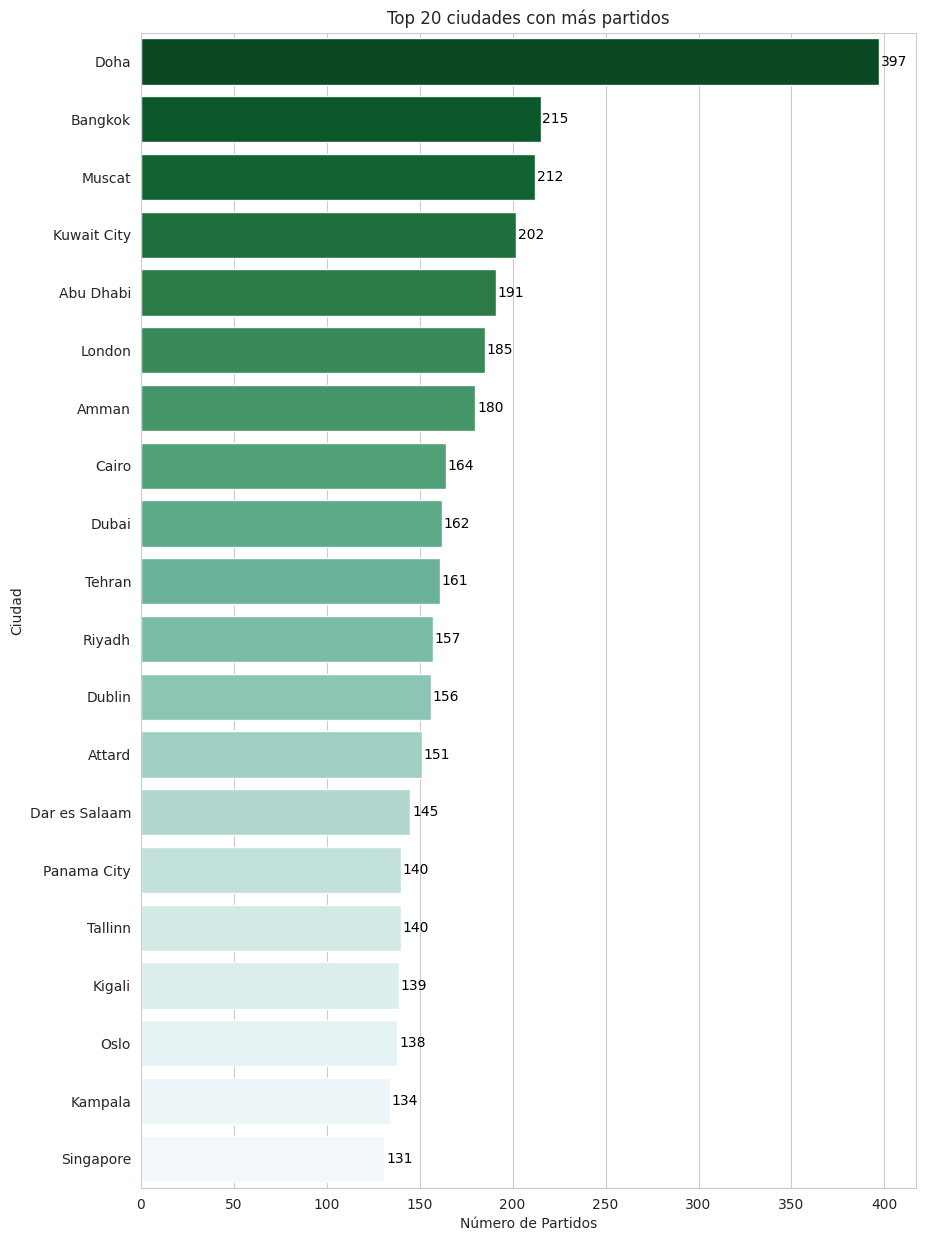

In [22]:
# configuración de estilo
sns.set_style("whitegrid")

# tomar las top 20 ciudades
city_dist = fifa['city'].value_counts().head(20).reset_index()
city_dist.columns = ['Ciudad', 'Número de Partidos']

# gráfico de barras horizontal con Seaborn
plt.figure(figsize=(10, 15))
barplot = sns.barplot(x='Número de Partidos', y='Ciudad', data=city_dist, palette="BuGn_r")

# mostrar los valores en cada barra
for index, value in enumerate(city_dist['Número de Partidos']):
    barplot.text(value + 8, index, str(value), color='black', ha="center", va="center")

plt.title('Top 20 ciudades con más partidos')
plt.xlabel('Número de Partidos')
plt.ylabel('Ciudad')
plt.show()

Doha es la ciudad anfitriona con más partidos de largo, seguida por Bangkok y Muscat.

#### Países con más partidos

Veamos en gráfico de barras los 10 países con más partidos

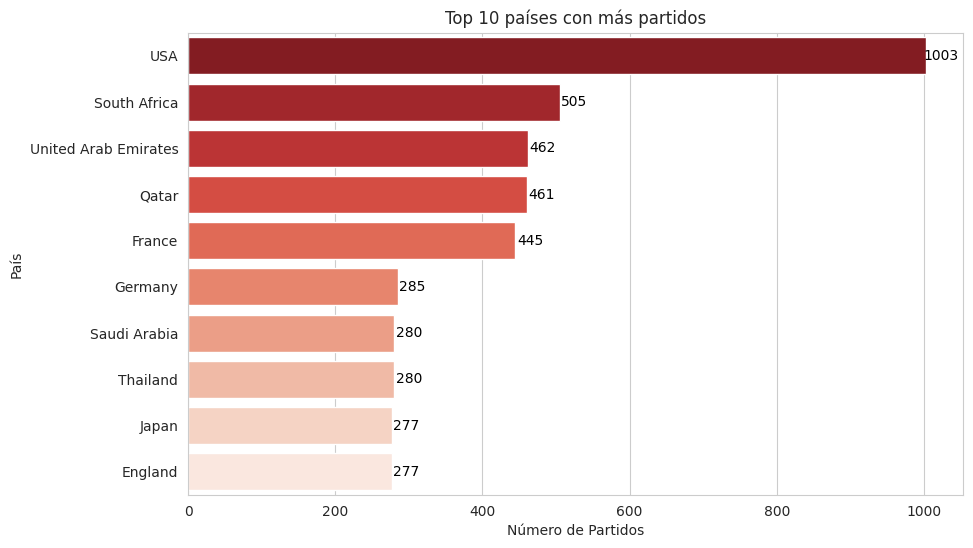

In [23]:
# configuración de estilo
sns.set_style("whitegrid")

# tomar los top 10 países
country_dist = fifa['country'].value_counts().head(10).reset_index()
country_dist.columns = ['País', 'Número de Partidos']

# gráfico de barras horizontal con Seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Número de Partidos', y='País', data=country_dist, palette="Reds_r")

# mostrar los valores en cada barra
for index, value in enumerate(country_dist['Número de Partidos']):
    barplot.text(value + 20, index, str(value), color='black', ha="center", va="center")

plt.title('Top 10 países con más partidos')
plt.xlabel('Número de Partidos')
plt.ylabel('País')
plt.show()

EE. UU. ha sido el anfitrión de la mayoría de los partidos, lo cual es interesante considerando que el fútbol no es el deporte más popular allí.

#### Distribución de goles

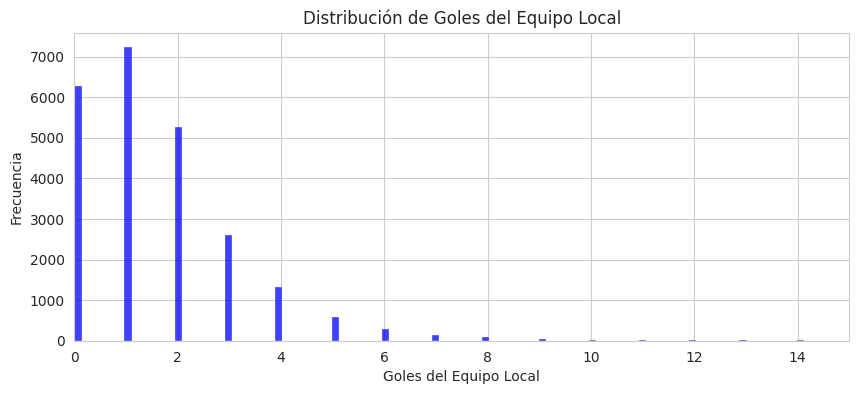

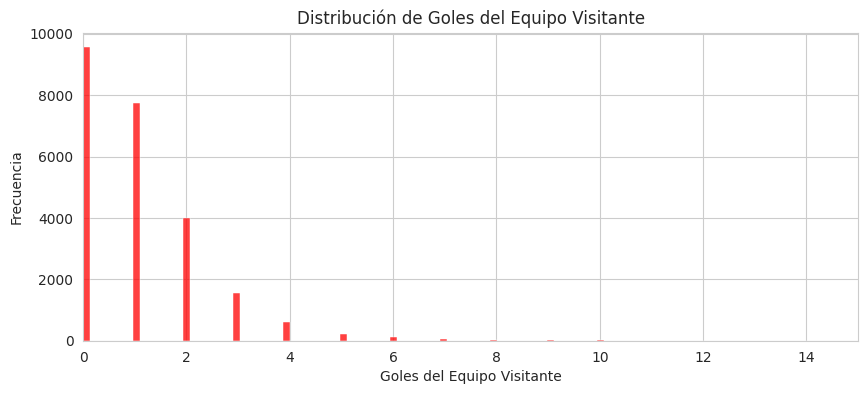

In [24]:
# configuración de estilo
sns.set_style("whitegrid")

# histograma para la distribución de goles del equipo local
plt.figure(figsize=(10, 4))
#sns.histplot(fifa['home_team_score'], bins=25, color="blue")
sns.histplot(fifa['home_team_score'], color="blue")
plt.title('Distribución de Goles del Equipo Local')
plt.xlabel('Goles del Equipo Local')
plt.ylabel('Frecuencia')
plt.xlim(0,15)
plt.show()

# histograma para la distribución de goles del equipo visitante
plt.figure(figsize=(10, 4))
#sns.histplot(fifa['away_team_score'], bins=25, color="red")
sns.histplot(fifa['away_team_score'], color="red")
plt.title('Distribución de Goles del Equipo Visitante')
plt.xlabel('Goles del Equipo Visitante')
plt.ylabel('Frecuencia')
plt.xlim(0,15)
plt.show()

La distribución de goles son similares tanto para los equipos locales como los visitantes. Aunque el equipo local, se puede observar que hay más cantidad de goles, siendo incluso mayor que 5.

#### Países con más veces en el top 5

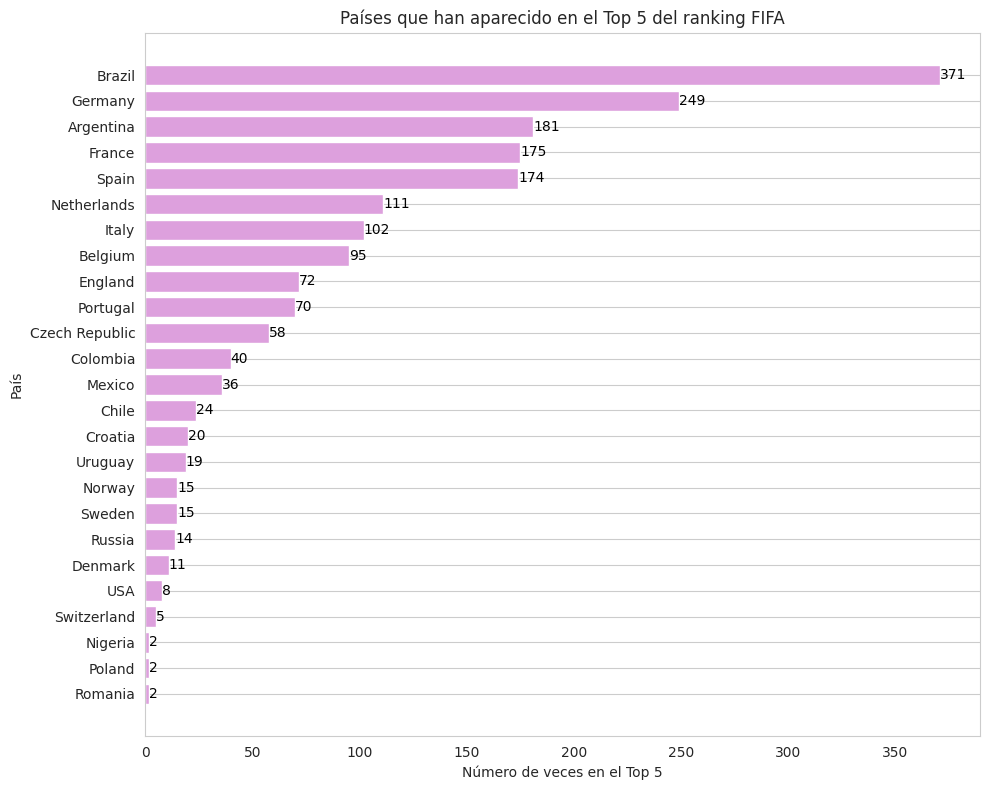

In [25]:
# conteo de veces que un equipo aparece en el top 5 como equipo local
top_5_home_counts = fifa[fifa['home_team_fifa_rank'] <= 5]['home_team'].value_counts()

# conteo de veces que un equipo aparece en el top 5 como equipo visitante
top_5_away_counts = fifa[fifa['away_team_fifa_rank'] <= 5]['away_team'].value_counts()

# sumatoria
total_top_5_counts = top_5_home_counts.add(top_5_away_counts, fill_value=0)

# filtro paísea que han aparecido al menos una vez en el top 5
countries_in_top_5 = total_top_5_counts[total_top_5_counts > 0]

# ordenar de mayor a menor
sorted_countries = countries_in_top_5.sort_values(ascending=True)

# Crear gráfico de barras horizontal
plt.figure(figsize=(10,8))
bars = plt.barh(sorted_countries.index, sorted_countries.values, color='plum')

# añadir números encima de las barras
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             int(bar.get_width()),  # el valor que queremos mostrar
             va='center', ha='left',  # alineación vertical y horizontal
             fontsize=10, color='black')  # tamaño y color del texto

# etiquetas y título
plt.xlabel('Número de veces en el Top 5')
plt.ylabel('País')
plt.title('Países que han aparecido en el Top 5 del ranking FIFA')
plt.grid(axis='x')

# mostrar gráfico
plt.tight_layout()
plt.show()

Se ha identificado que los 5 países que han estado en top 5 del ranking más veces son:
1. Brazil - 371
2. Alemania - 249
3. Argentina - 181
4. Francia - 175
5. España - 174

#### Tendencia puntos FIFA por año

Veamos la tendencia de los 5 países que han estado en el top 5 para ver el crecimiento

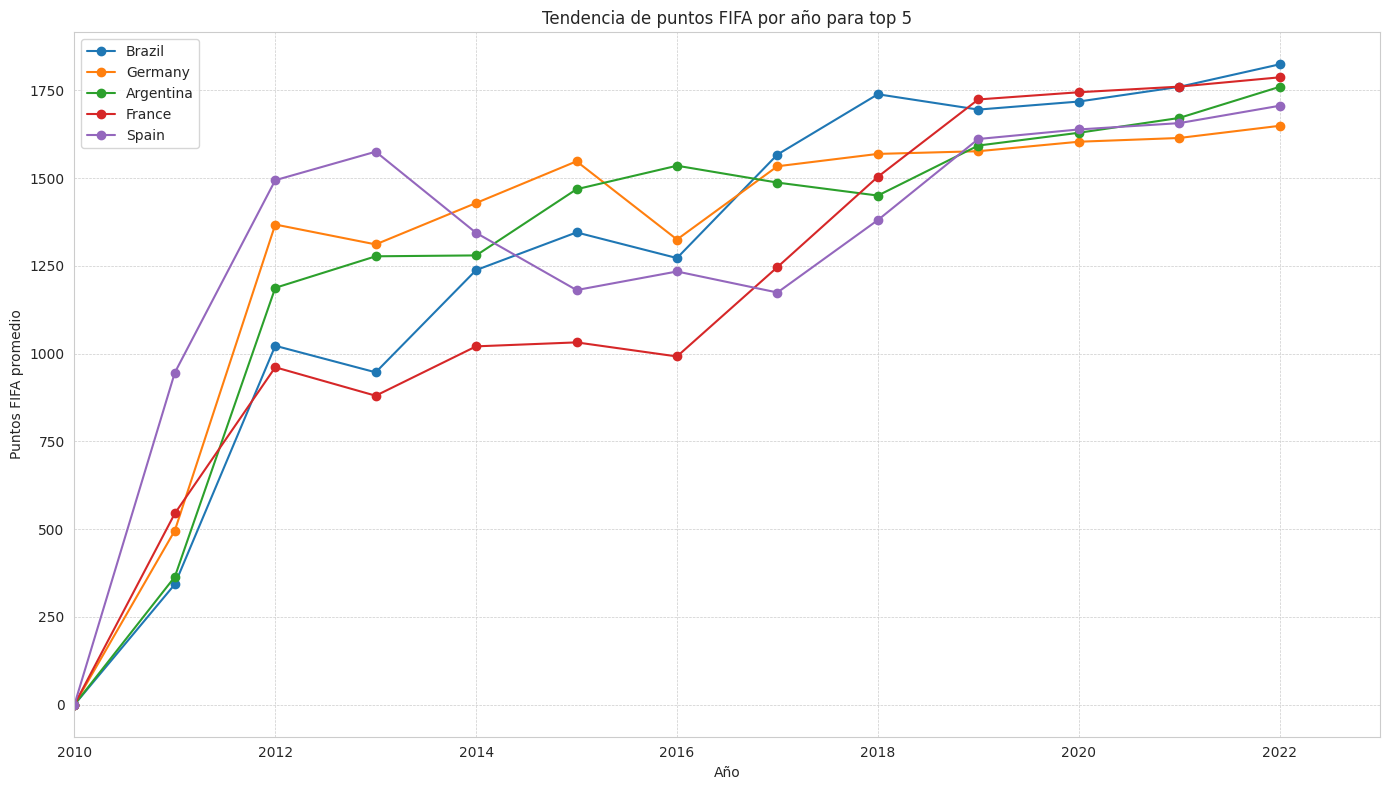

In [26]:
# filtrar dataframe países
countries = ["Brazil", "Germany", "Argentina", "France", "Spain"]
filtered_df = fifa[fifa['home_team'].isin(countries)]

# agrupar por año y país, calcular puntuación FIFA promedio
grouped = filtered_df.groupby(['year', 'home_team'])['home_team_total_fifa_points'].mean().unstack()

# gráfico de línea
plt.figure(figsize=(14, 8))

for country in countries:
    plt.plot(grouped.index, grouped[country], label=country, marker='o')

# ajustes del gráfico
plt.title('Tendencia de puntos FIFA por año para top 5')
plt.xlabel('Año')
plt.ylabel('Puntos FIFA promedio')
plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim(2010,2023)

# mostrar gráfico
plt.tight_layout()
plt.show()

Vemos que Argentina ha sido el equipo que ha mejorado más a través de los años y en el último tiempo se ha mantenido entre el top 1 y 2.

### Análisis de correlación de los datos

Se procede a generar un mapas de calor para identificar las correlaciones entre diferentes variables.


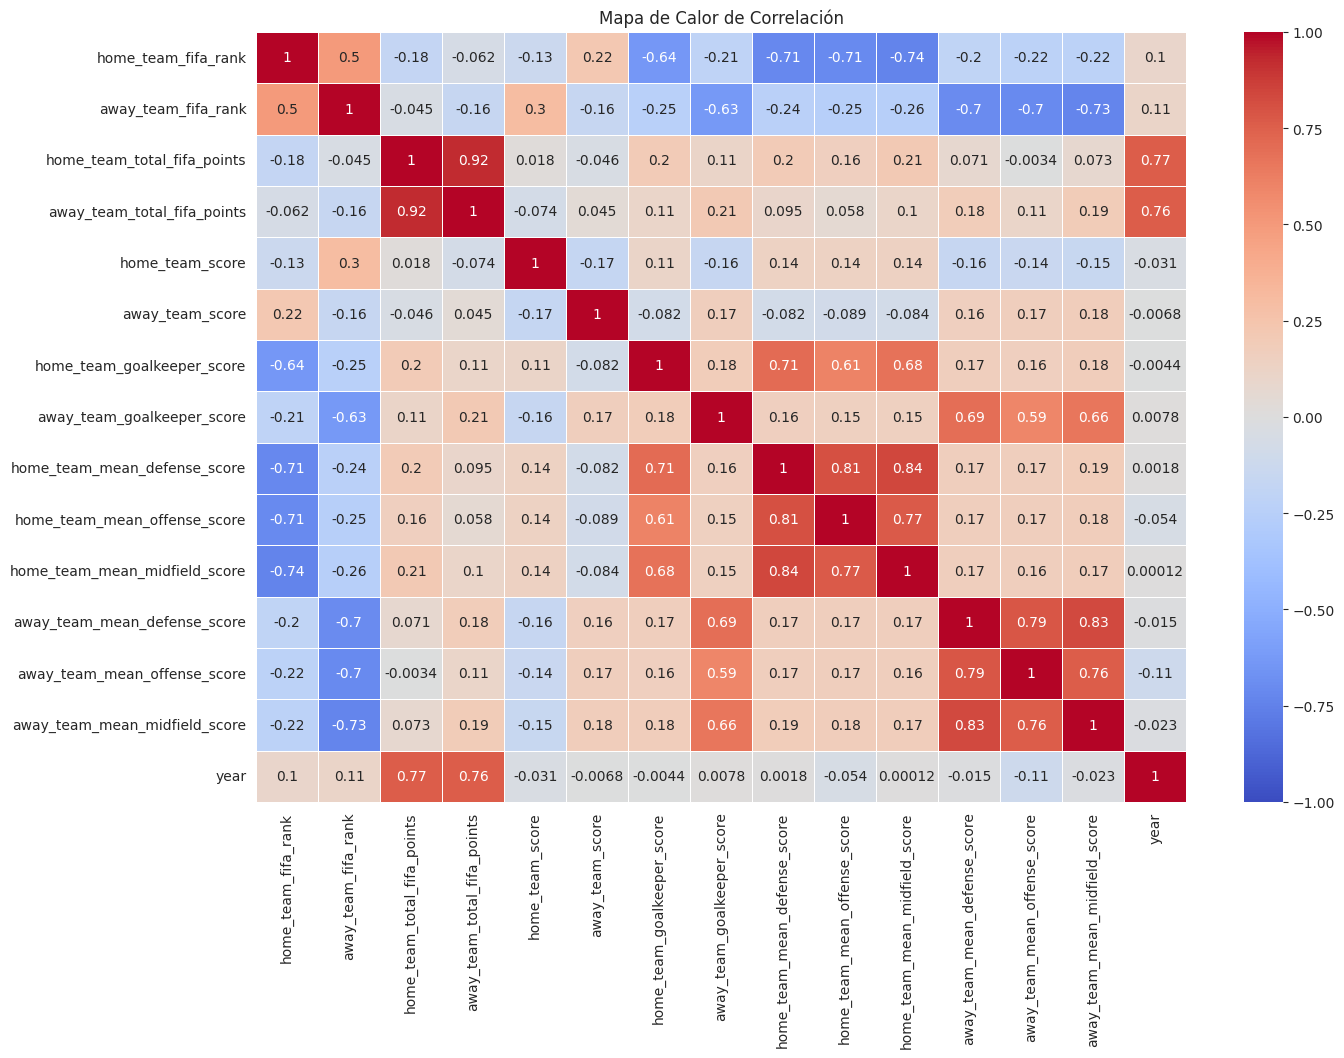

In [27]:
# calculando la matriz de correlación
correlation_matrix = fifa[['home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points',
                           'away_team_total_fifa_points', 'home_team_score', 'away_team_score',
                           'home_team_goalkeeper_score', 'away_team_goalkeeper_score', 'home_team_mean_defense_score',
                           'home_team_mean_offense_score', 'home_team_mean_midfield_score', 'away_team_mean_defense_score',
                           'away_team_mean_offense_score', 'away_team_mean_midfield_score', 'year']].corr()

# creando el mapa de calor
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, vmin=-1, vmax=1)
plt.title("Mapa de Calor de Correlación")
plt.show()

Para entender y analizar estas correlaciones, es importante tomar en cuenta que el coeficiente de correlación puede variar entre -1 y 1.

- **Cercano a 1:** indica una correlación positiva fuerte.
- **Cercano a -1:** indica una correlación negativa fuerte.
- **Cercano a 0:** poca o ninguna correlación.

A continuación, resalto las correlaciones más significativas:

1. **Correlaciones Fuertes Positivas (cercano a 1):**   
  - `home_team_total_fifa_points` y `away_team_total_fifa_points`: 0.923608. Significa que cuando un equipo local tiene un alto puntaje en la FIFA, generalmente también se enfrenta a un equipo visitante con un alto puntaje.
  - `year` con `home_team_total_fifa_points`: 0.765412 y `year` con `away_team_total_fifa_points`: 0.762458. Estas correlaciones podrían indicar que a medida que pasan los años, hay una tendencia creciente en los puntos FIFA totales para los equipos.
  - Hay fuertes correlaciones entre las puntuaciones de los jugadores (portero, defensa, ofensiva, medio campo) dentro del mismo equipo. Por ejemplo, `home_team_goalkeeper_score` y `home_team_mean_defense_score`: 0.709909.

2. **Correlaciones Fuertes Negativas (cercano a -1):**
  - Hay correlaciones negativas notables entre el ranking FIFA de los equipos y las puntuaciones de sus jugadores. Por ejemplo, `home_team_fifa_rank` y `home_team_mean_midfield_score`: -0.736180. Esto podría indicar que los equipos con un ranking más bajo (es decir, mejor posición en el ranking) tienden a tener puntuaciones de jugadores más altas.

3. **Poca o Ninguna Correlación (cercano a 0):**
  - Hay varias correlaciones que están cerca de cero, lo que indica que las dos variables no tienen una relación lineal fuerte. Por ejemplo, `home_team_score` y `home_team_total_fifa_points`: 0.018280.

## Modelo predictivo
Se procede a construir un modelo que prediga el resultado de un partido y compararlo con las predicciones basadas en el ranking FIFA.

Objetivo categórico:
- `home_team_result`: resultado del equipo local (puede ser "Ganar" (1), "Empatar" (0.5) o "Perder" (0)).

Caracéristicas a tomar en cuenta:
- `neutral_location`: booleano (True/False) que indica si el partido se llevó a cabo en una ubicación neutral (es decir, no es el hogar de ninguno de los equipos).
- `home_team_goalkeeper_score`: calificación del portero del equipo local.
- `away_team_goalkeeper_score`: calificación del portero del equipo visitante.
- `home_team_mean_defense_score`: calificación media de la defensa del equipo local.
- `home_team_mean_offense_score`: calificación media del ataque del equipo local.
- `home_team_mean_midfield_score`: calificación media del mediocampo del equipo local.
- `away_team_mean_defense_score`: calificación media de la defensa del equipo visitante.
- `away_team_mean_offense_score`: calificación media del ataque del equipo visitante.
- `away_team_mean_midfield_score`: calificación media del mediocampo del equipo visitante.

In [28]:
#separa variables que se usaran en el modelo
model_df = fifa.loc[:,['home_team_result','neutral_location','home_team_goalkeeper_score','away_team_goalkeeper_score',
                       'home_team_mean_defense_score','home_team_mean_offense_score','home_team_mean_midfield_score',
                       'away_team_mean_defense_score','away_team_mean_offense_score','away_team_mean_midfield_score']]
model_df = model_df.dropna()
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4303 entries, 8264 to 23918
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   home_team_result               4303 non-null   object 
 1   neutral_location               4303 non-null   bool   
 2   home_team_goalkeeper_score     4303 non-null   float64
 3   away_team_goalkeeper_score     4303 non-null   float64
 4   home_team_mean_defense_score   4303 non-null   float64
 5   home_team_mean_offense_score   4303 non-null   float64
 6   home_team_mean_midfield_score  4303 non-null   float64
 7   away_team_mean_defense_score   4303 non-null   float64
 8   away_team_mean_offense_score   4303 non-null   float64
 9   away_team_mean_midfield_score  4303 non-null   float64
dtypes: bool(1), float64(8), object(1)
memory usage: 340.4+ KB


Se tienen los datos del tipo correcto y sin valores ausentes

Se segmentan los datos fuente en 3 conjuntos:

- conjunto de entrenamiento (60%)
- conjunto de validación (20%)
- conjunto de prueba (20%)

In [29]:
#Separar conjunto de datos de prueba
df_t, df_test = train_test_split(model_df,test_size=0.2,random_state=12345)

#Separar conjunto de datos de entrenamiento y validacion. El test_size sube para compensar la reducción de filas
df_train, df_valid = train_test_split(df_t,test_size=0.25,random_state=12345)

In [30]:
#Separar variables de conjunto de entrenamiento
df_train_features = df_train.drop('home_team_result',axis=1)
df_train_target =  df_train['home_team_result']

#Separar variables de conjunto de validación
df_valid_features = df_valid.drop('home_team_result',axis=1)
df_valid_target = df_valid['home_team_result']

#Separar variables de conjunto de prueba
df_test_features = df_test.drop('home_team_result',axis=1)
df_test_target = df_test['home_team_result']

#verificar variables y tamaños
print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

(2581, 10)
(861, 10)
(861, 10)


Se entrenan 3 modelos diferentes y se comparan sus resultados para evaluar su funcionamiento.

###   Modelo: Árbol de decisión para clasificación

In [31]:
#buscar las mejores características con GridSearchCV, para buscar la mejor profundidad de árbol
param_grid = {'max_depth': [1, 2, 3, 4, 5,6,7,8,9,10,20,30,40],'criterion':['gini','entropy'], }

tree_clas = DecisionTreeClassifier(random_state=12345)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(df_train_features, df_train_target)

final_model = grid_search.best_estimator_
final_model

Fitting 5 folds for each of 26 candidates, totalling 130 fits


DecisionTreeClassifier(max_depth=4, random_state=12345)

In [32]:
#fijar modelo con parámetros encontrados
model_dtc = DecisionTreeClassifier(random_state=12345, max_depth=4)
model_dtc.fit(df_train_features, df_train_target)

DecisionTreeClassifier(max_depth=4, random_state=12345)

In [33]:
#predicciones de los 3 conjuntos de datos
train_predictions_dtc = model_dtc.predict(df_train_features)
test_predictions_dtc = model_dtc.predict(df_test_features)
valid_predictions_dtc = model_dtc.predict(df_valid_features)

#comprobar calidad del modelo
print('Accuracy')
print('Training set:',   accuracy_score(df_train_target, train_predictions_dtc))
print('Test set:',       accuracy_score(df_test_target,  test_predictions_dtc))
print('Validation set:', accuracy_score(df_valid_target, valid_predictions_dtc))

Accuracy
Training set: 0.5373886090662534
Test set: 0.5133565621370499
Validation set: 0.5331010452961672


### Modelo: Bosque aleatorio para clasificación

In [34]:
#buscar las mejores características para los datos disponibles
model_rfc =RandomForestClassifier(random_state=12345)
param_grid = {'n_estimators': [1,2,3,4,5,6,7,8,9,10],'max_features': [ 'sqrt', 'log2'],'max_depth' : [3,4,5,6,7,8,9,10]}
CV_rfc = GridSearchCV(estimator=model_rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(df_train_features,df_train_target)
CV_rfc.best_params_

{'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 8}

In [35]:
#fijar modelo con parámetros encontrados
model_rfc = RandomForestClassifier(random_state=12345, max_depth=4, max_features= 'sqrt',n_estimators=8)
model_rfc.fit(df_train_features,df_train_target)

RandomForestClassifier(max_depth=4, n_estimators=8, random_state=12345)

In [36]:
#predicciones de los 3 conjuntos de datos
train_predictions_rfc = model_rfc.predict(df_train_features)
test_predictions_rfc = model_rfc.predict(df_test_features)
valid_predictions_rfc = model_rfc.predict(df_valid_features)

#comprobar calidad del modelo
print('Accuracy')
print('Training set:',   accuracy_score(df_train_target, train_predictions_rfc))
print('Test set:',       accuracy_score(df_test_target,  test_predictions_rfc))
print('Validation set:', accuracy_score(df_valid_target, valid_predictions_rfc))

Accuracy
Training set: 0.5470747772181325
Test set: 0.5087108013937283
Validation set: 0.5412311265969802


### Modelo: Regresión logística

In [37]:
# constructor de regresión logística
model_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_lr.fit(df_train_features,df_train_target)

LogisticRegression(random_state=12345, solver='liblinear')

In [38]:
#predicciones de los 3 conjuntos de datos
train_predictions_lr = model_lr.predict(df_train_features)
test_predictions_lr = model_lr.predict(df_test_features)
valid_predictions_lr = model_lr.predict(df_valid_features)

#comprobar calidad del modelo
print('Accuracy')
print('Training set:',   accuracy_score(df_train_target, train_predictions_lr))
print('Test set:',       accuracy_score(df_test_target,  test_predictions_lr))
print('Validation set:', accuracy_score(df_valid_target, valid_predictions_lr))

Accuracy
Training set: 0.5366137156141031
Test set: 0.5389082462253194
Validation set: 0.537746806039489


In [39]:
df_train_target.head(3)

14350     Win
14809    Draw
13212    Draw
Name: home_team_result, dtype: object

### ¿Que tanta precisión tiene el ranking fifa?

In [40]:
# modelo predictivo segun el ranking FIFA
fifa['rank_predictions'] = np.where(fifa['home_team_fifa_rank'] > fifa['away_team_fifa_rank'],'Win',
                           np.where(abs(fifa['home_team_fifa_rank'] - fifa['away_team_fifa_rank'])<10, 'Draw','Lose'))
fifa.loc[:,['date','home_team','away_team','home_team_result','home_team_fifa_rank','away_team_fifa_rank','rank_predictions']].head(10)

,date,home_team,away_team,home_team_result,home_team_fifa_rank,away_team_fifa_rank,rank_predictions
0,1993-08-08,Bolivia,Uruguay,Win,59,22,Win
1,1993-08-08,Brazil,Mexico,Draw,8,14,Draw
2,1993-08-08,Ecuador,Venezuela,Win,35,94,Lose
3,1993-08-08,Guinea,Sierra Leone,Win,65,86,Lose
4,1993-08-08,Paraguay,Argentina,Lose,67,5,Win
5,1993-08-08,Peru,Colombia,Lose,70,19,Win
6,1993-08-08,Zimbabwe,Eswatini,Win,50,102,Lose
7,1993-08-09,Guinea,Sierra Leone,Win,65,86,Lose
8,1993-08-11,Faroe Islands,Norway,Lose,111,9,Win
9,1993-08-11,Sweden,Switzerland,Lose,4,3,Win


In [41]:
#comprobar calidad del modelo usando ranking fifa
print('Accuracy',   accuracy_score(fifa['home_team_result'], fifa['rank_predictions']))

Accuracy 0.22026671125789055


Historicamente, el ranking FIFA ha tenido cambios por lo que es de esperarse que tenga una baja exactitud.

In [42]:
#Exactitud tomando los ultimos 10 años (2012 - 2022)
fifa_10 = fifa[fifa['year'] > 2011]
print('Accuracy',   accuracy_score(fifa_10['home_team_result'], fifa_10['rank_predictions']))

Accuracy 0.213089802130898


In [43]:
#Vista previa
fifa_10.loc[:,['date','home_team','away_team','home_team_result','home_team_fifa_rank','away_team_fifa_rank','rank_predictions']].head(10)

,date,home_team,away_team,home_team_result,home_team_fifa_rank,away_team_fifa_rank,rank_predictions
14723,2012-01-06,Equatorial Guinea,South Africa,Draw,150,52,Win
14724,2012-01-07,Botswana,Zimbabwe,Draw,95,98,Draw
14725,2012-01-09,Gabon,Burkina Faso,Draw,77,62,Win
14726,2012-01-09,Tunisia,Sudan,Win,59,113,Lose
14727,2012-01-11,Nigeria,Angola,Draw,43,83,Lose
14728,2012-01-12,Senegal,Sudan,Win,44,113,Lose
14729,2012-01-13,Tunisia,Côte d'Ivoire,Lose,59,16,Win
14730,2012-01-14,Angola,Sierra Leone,Win,83,60,Win
14731,2012-01-14,Zambia,Namibia,Draw,79,121,Lose
14732,2012-01-15,Oman,Congo DR,Draw,85,125,Lose


## Evaluación de la ventaja del equipo local
 Se investiga la existencia y magnitud de la ventaja que puede tener un equipo al jugar en su propio país o continente, y cómo esta ventaja se manifiesta en diferentes torneos.

<ipython-input-44-cea25844e6a4>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  home_team['home_team_result'].value_counts().plot(kind='bar',ax=plt.subplot(1,3, 1),color=['limegreen','red','yellow'])


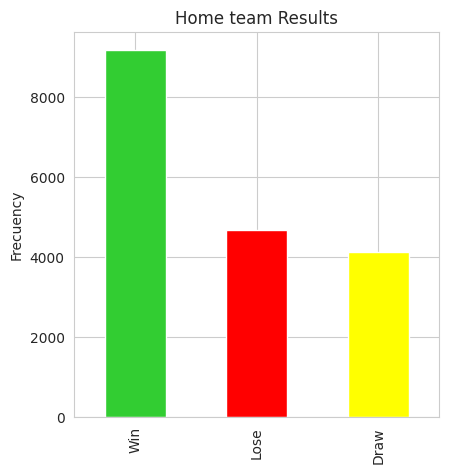

In [44]:
#partidos donde el equipo local juega en su país
home_team = fifa [fifa['neutral_location']==False]

#graficar los resultados
plt.subplots(figsize=(16, 5))
home_team['home_team_result'].value_counts().plot(kind='bar',ax=plt.subplot(1,3, 1),color=['limegreen','red','yellow'])
plt.title('Home team Results')
plt.ylabel('Frecuency')

plt.show()

In [45]:
home_team['home_team_result'].value_counts()

Win     9162
Lose    4675
Draw    4110
Name: home_team_result, dtype: int64

In [46]:
js = home_team['home_team_result'].value_counts().to_json(orient = 'columns')
print(js)


{"Win":9162,"Lose":4675,"Draw":4110}


In [47]:
home_team['home_team_result'].value_counts()/home_team.shape[0]*100

Win     51.050315
Lose    26.048922
Draw    22.900763
Name: home_team_result, dtype: float64

Al analizar los resultados cuando un partido se hace en el país al que pertenece el equipo, ese equipo el 51.05% de las veces gana, el 26.05% pierde y el 22.90% empata.

Estos resultados le dan ventaja al equipo sede.

In [48]:
fifa['tournament'].value_counts()

Friendly                                8558
FIFA World Cup qualification            5528
UEFA Euro qualification                 1723
African Cup of Nations qualification    1274
AFC Asian Cup qualification              541
                                        ... 
AFF Championship qualification             2
Cup of Ancient Civilizations               2
TIFOCO Tournament                          1
Copa Confraternidad                        1
CONMEBOL–UEFA Cup of Champions             1
Name: tournament, Length: 82, dtype: int64

Sin tomar en cuenta los partidos amistosos, los torneos de los que se tiene más información son:
- FIFA World Cup qualification
- UEFA Euro qualification
- African Cup of Nations qualification

Se toman estos para continuar el análisis tomando en cuenta el torneo.

In [49]:
#datos separados por torneo, donde el equipo local juega en su país
fifa_wcq = home_team[home_team['tournament'] == 'FIFA World Cup qualification']
fifa_uefa = home_team[home_team['tournament'] == 'UEFA Euro qualification']
fifa_acnq = home_team[home_team['tournament'] == 'African Cup of Nations qualification']

In [50]:
#Exportar datos de las 3 graficas
js_wcq = fifa_wcq['home_team_result'].value_counts().to_json(orient = 'columns')
print(js_wcq)

js_uefa = fifa_uefa['home_team_result'].value_counts().to_json(orient = 'columns')
print(js_uefa)

js_acnq = fifa_acnq['home_team_result'].value_counts().to_json(orient = 'columns')
print(js_acnq)

{"Win":2633,"Lose":1396,"Draw":1108}
{"Win":809,"Lose":587,"Draw":309}
{"Win":684,"Draw":291,"Lose":250}


<ipython-input-51-f6ba05d23acd>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  fifa_wcq['home_team_result'].value_counts().plot(kind='bar',ax=plt.subplot(1,3, 1),color=['limegreen','red','yellow'])


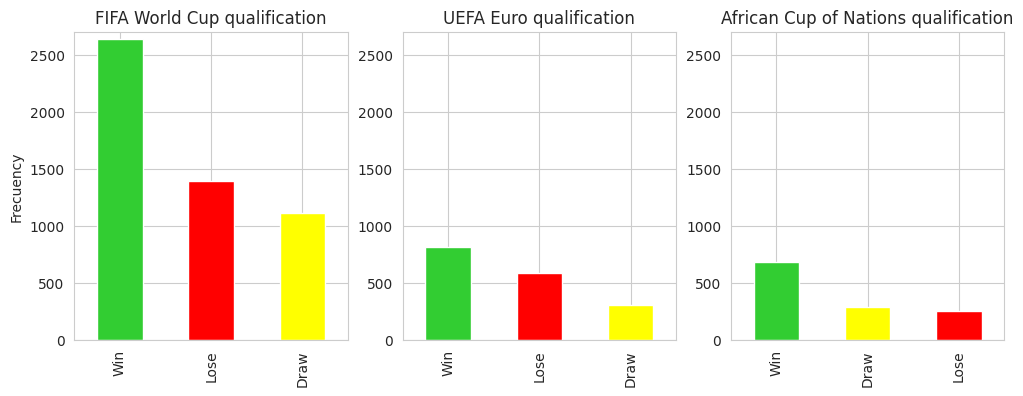

In [51]:
#graficar 3 torneos
plt.subplots(figsize=(12, 4))

fifa_wcq['home_team_result'].value_counts().plot(kind='bar',ax=plt.subplot(1,3, 1),color=['limegreen','red','yellow'])
plt.title('FIFA World Cup qualification')
plt.ylim(0,2700)
plt.ylabel('Frecuency')

fifa_uefa['home_team_result'].value_counts().plot(kind='bar',ax=plt.subplot(1,3, 2),color=['limegreen','red','yellow'])
plt.title('UEFA Euro qualification')
plt.ylim(0,2700)

fifa_acnq['home_team_result'].value_counts().plot(kind='bar',ax=plt.subplot(1,3, 3),color=['limegreen','yellow','red'])
plt.title('African Cup of Nations qualification')
plt.ylim(0,2700)

plt.show()

In [52]:
#Porcentaje de resultados del torneo FIFA World Cup qualification
fifa_wcq['home_team_result'].value_counts()/fifa_wcq.shape[0]*100

Win     51.255597
Lose    27.175394
Draw    21.569009
Name: home_team_result, dtype: float64

In [53]:
#Porcentaje de resultados del torneo UEFA Euro qualification
fifa_uefa['home_team_result'].value_counts()/fifa_uefa.shape[0]*100

Win     47.448680
Lose    34.428152
Draw    18.123167
Name: home_team_result, dtype: float64

In [54]:
#Porcentaje de resultados del torneo African Cup of Nations qualification
fifa_acnq['home_team_result'].value_counts()/fifa_acnq.shape[0]*100

Win     55.836735
Draw    23.755102
Lose    20.408163
Name: home_team_result, dtype: float64

Al analizar la posible ventaja que puede tener un equipo al jugar en su propio país en distintos torneos, se obtuvieron porcentajes similares donde la mitad o incluso más de los partidos, el equipo sede gana.

## Influencia del portero en rondas de penaltis

 Se estudia la contribución y efectividad de los porteros durante las rondas de penaltis para determinar cuánto impactan en el resultado final de dichas rondas.

 Se toman en cuenta unicamente los partidos donde hubo penales y se tiene la calificación del portero del equipo local y la del visitante.

<ipython-input-55-a126b1090151>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fifa_penal[fifa['home_team_result']=='Win'].hist(column='home_team_goalkeeper_score',ax=plt.subplot(1,2, 1),color='limegreen')
<ipython-input-55-a126b1090151>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  fifa_penal[fifa['home_team_result']=='Win'].hist(column='home_team_goalkeeper_score',ax=plt.subplot(1,2, 1),color='limegreen')
<ipython-input-55-a126b1090151>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fifa_penal[fifa['home_team_result']=='Lose'].hist(column='away_team_goalkeeper_score',ax=plt.subplot(1, 2, 2),color='limegreen')


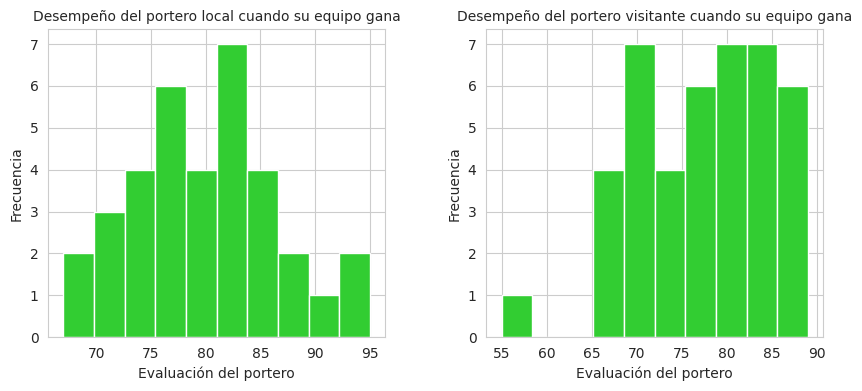

In [55]:
#datos cuando hay penales
fifa_penal = fifa[(fifa['shoot_out']=='Yes') & (fifa['home_team_goalkeeper_score'].isna()==False)
                                                  & (fifa['away_team_goalkeeper_score'].isna()==False)]
plt.subplots(figsize=(10, 4))

fifa_penal[fifa['home_team_result']=='Win'].hist(column='home_team_goalkeeper_score',ax=plt.subplot(1,2, 1),color='limegreen')
plt.title('Desempeño del portero local cuando su equipo gana',size=10)
plt.xlabel('Evaluación del portero')
plt.ylabel('Frecuencia')

fifa_penal[fifa['home_team_result']=='Lose'].hist(column='away_team_goalkeeper_score',ax=plt.subplot(1, 2, 2),color='limegreen')
plt.title('Desempeño del portero visitante cuando su equipo gana',size=10)
plt.xlabel('Evaluación del portero')
plt.ylabel('Frecuencia')

plt.show()

In [56]:
#Partidos analizados
len(fifa_penal)

77

<ipython-input-57-bcfbe344f915>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fifa_penal[fifa['home_team_result']=='Lose'].hist(
<ipython-input-57-bcfbe344f915>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot(1,2, 1),
<ipython-input-57-bcfbe344f915>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fifa_penal[fifa['home_team_result']=='Win'].hist(


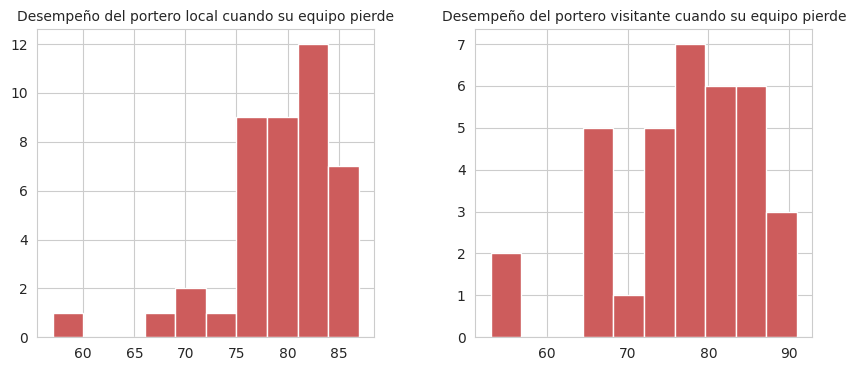

In [57]:
plt.subplots(figsize=(10, 4))

fifa_penal[fifa['home_team_result']=='Lose'].hist(
    column='home_team_goalkeeper_score',
    ax=plt.subplot(1,2, 1),
    color='indianred'
)

plt.title('Desempeño del portero local cuando su equipo pierde',size=10)

fifa_penal[fifa['home_team_result']=='Win'].hist(
    column='away_team_goalkeeper_score',
    ax=plt.subplot(1, 2, 2),
    color='indianred'
)
plt.title('Desempeño del portero visitante cuando su equipo pierde',size=10)
plt.show()



Visualmente no se observan diferencias significativas en el resultado del partido que dependan del desempeño del portero.

Se continua con una prueba de hipótesis sobre la igualdad de las medias de dos poblaciones. Para ello, se agrupan las calificaciones de los porteros donde su equipo ganó, sin importar si el equipo era local o visitante.

<ipython-input-58-fc691904586b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  goalkeeper_score_win = fifa_penal[fifa['home_team_result']=='Win']['home_team_goalkeeper_score'].tolist()
<ipython-input-58-fc691904586b>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  goalkeeper_score_win += fifa_penal[fifa['home_team_result']=='Lose']['away_team_goalkeeper_score'].tolist()


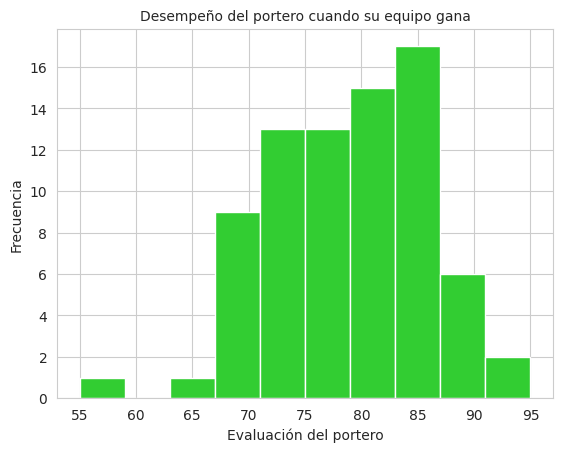

In [58]:
#desempeño del portero local cuando su equipo ganó
goalkeeper_score_win = fifa_penal[fifa['home_team_result']=='Win']['home_team_goalkeeper_score'].tolist()

#agregar desempeño del portero visitante cuando su equipo ganó
goalkeeper_score_win += fifa_penal[fifa['home_team_result']=='Lose']['away_team_goalkeeper_score'].tolist()

pd.Series(goalkeeper_score_win).hist(color='limegreen')
plt.title('Desempeño del portero cuando su equipo gana',size=10)
plt.xlabel('Evaluación del portero')
plt.ylabel('Frecuencia')
plt.show()

In [59]:
#Exportar datos
js_win = pd.Series(goalkeeper_score_win).to_json(orient = 'columns')
print(js_win)

{"0":83.0,"1":81.0,"2":93.0,"3":95.0,"4":89.0,"5":76.0,"6":69.0,"7":76.0,"8":71.0,"9":88.0,"10":71.0,"11":82.0,"12":78.0,"13":80.0,"14":70.0,"15":79.0,"16":83.0,"17":82.0,"18":90.0,"19":85.0,"20":73.0,"21":77.0,"22":79.0,"23":85.0,"24":86.0,"25":77.0,"26":83.0,"27":74.0,"28":79.0,"29":73.0,"30":82.0,"31":85.0,"32":73.0,"33":67.0,"34":77.0,"35":70.0,"36":78.0,"37":69.0,"38":83.0,"39":88.0,"40":79.0,"41":77.0,"42":77.0,"43":76.0,"44":71.0,"45":55.0,"46":71.0,"47":86.0,"48":89.0,"49":83.0,"50":66.0,"51":87.0,"52":79.0,"53":68.0,"54":75.0,"55":71.0,"56":78.0,"57":79.0,"58":83.0,"59":81.0,"60":85.0,"61":82.0,"62":85.0,"63":83.0,"64":79.0,"65":73.0,"66":67.0,"67":71.0,"68":67.0,"69":69.0,"70":74.0,"71":86.0,"72":86.0,"73":79.0,"74":85.0,"75":78.0,"76":74.0}


In [60]:
#Promedio
statistics.mean(goalkeeper_score_win)

78.35064935064935

<ipython-input-61-598581084417>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  goalkeeper_score_lose = fifa_penal[fifa['home_team_result']=='Lose']['home_team_goalkeeper_score'].tolist()
<ipython-input-61-598581084417>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  goalkeeper_score_lose += fifa_penal[fifa['home_team_result']=='Win']['away_team_goalkeeper_score'].tolist()


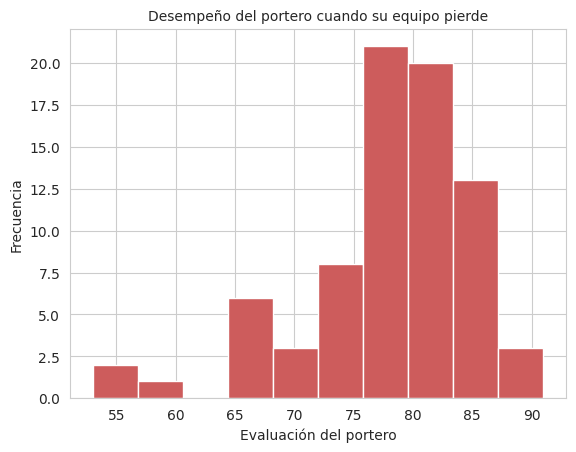

In [61]:
#desempeño del portero local cuando su equipo perdió
goalkeeper_score_lose = fifa_penal[fifa['home_team_result']=='Lose']['home_team_goalkeeper_score'].tolist()

#agregar desempeño del portero visitante cuando su equipo perdió
goalkeeper_score_lose += fifa_penal[fifa['home_team_result']=='Win']['away_team_goalkeeper_score'].tolist()

pd.Series(goalkeeper_score_lose).hist(color='indianred')
plt.title('Desempeño del portero cuando su equipo pierde',size=10)
plt.xlabel('Evaluación del portero')
plt.ylabel('Frecuencia')
plt.show()

In [62]:
#Exportar datos
js_lose = pd.Series(goalkeeper_score_lose).to_json(orient = 'columns')
print(js_lose)

{"0":85.0,"1":78.0,"2":84.0,"3":87.0,"4":77.0,"5":77.0,"6":75.0,"7":77.0,"8":77.0,"9":86.0,"10":67.0,"11":77.0,"12":83.0,"13":81.0,"14":80.0,"15":77.0,"16":81.0,"17":80.0,"18":57.0,"19":82.0,"20":82.0,"21":73.0,"22":82.0,"23":79.0,"24":79.0,"25":84.0,"26":79.0,"27":79.0,"28":82.0,"29":78.0,"30":81.0,"31":77.0,"32":69.0,"33":69.0,"34":75.0,"35":81.0,"36":87.0,"37":86.0,"38":82.0,"39":82.0,"40":82.0,"41":79.0,"42":82.0,"43":67.0,"44":87.0,"45":90.0,"46":91.0,"47":66.0,"48":71.0,"49":83.0,"50":56.0,"51":87.0,"52":65.0,"53":81.0,"54":74.0,"55":78.0,"56":67.0,"57":77.0,"58":79.0,"59":76.0,"60":84.0,"61":83.0,"62":83.0,"63":53.0,"64":90.0,"65":83.0,"66":77.0,"67":87.0,"68":75.0,"69":68.0,"70":87.0,"71":72.0,"72":79.0,"73":86.0,"74":79.0,"75":73.0,"76":74.0}


In [63]:
#Promedio
statistics.mean(goalkeeper_score_lose)

78.24675324675324

Se continua con la prueba de hipótesis donde:
- Hipótesis nula establece que las medias de ambas muestras son iguales
- Hipótesis alterna establece que las medias de ambas muestras son diferentes

En base a los graficos anteriores, se considera que las
varianzas de las poblaciones son iguales.

In [64]:
# Prueba de hipótesis sobre la igualdad de las medias de dos poblaciones
alpha = 0.05 #nivel de significancia estadística crítica

results = st.ttest_ind(goalkeeper_score_win, goalkeeper_score_lose)
print('p-value: ', results.pvalue)
if results.pvalue < alpha:  print("Se rechaza la hipótesis nula")
else: print("No se rechaza la hipótesis nula")

p-value:  0.9304364213656416
No se rechaza la hipótesis nula


No se rechaza la hipótesis nula, por lo que no hay evidencias para afirmar que la contribución y efectividad de los porteros tiene impacto sobre el resultado final de los partidos con penaltis.

## Conclusiones


A partir de todo lo realizado, se procede a realizar las siguientes conclusiones:

1. **Modelado de Predicciones:** Se ha trabajado en la creación de un modelo de predicción para determinar el resultado de un partido de fútbol basado en características como la ubicación del partido, el desempeño de los porteros y el rendimiento general de los equipos en áreas como la defensa, el ataque y el mediocampo.

2. **Eficacia del Ranking FIFA:** A pesar de que el ranking FIFA se considera una herramienta vital para determinar la capacidad y el desempeño de los equipos, el análisis revela que su precisión para predecir los resultados de los partidos es relativamente baja. La exactitud disminuyó aún más cuando se consideraron solo los últimos diez años, lo que sugiere que el ranking FIFA ha sufrido cambios que pueden haber afectado su predictibilidad.

3. **Ventaja de Jugar en Casa:** Existe una clara indicación de que los equipos tienen una ventaja cuando juegan en su propio país o continente. Aproximadamente la mitad o incluso más de los partidos resultan en una victoria para el equipo local, independientemente del torneo que se analice.

4. **Impacto del Portero en Penales:** A pesar de la percepción común de que los porteros juegan un papel crucial durante las rondas de penaltis, los análisis estadísticos no respaldan completamente esta idea. La prueba de hipótesis no encontró diferencias significativas en la efectividad de los porteros que ganan o pierden durante los penales, lo que sugiere que otros factores también pueden ser determinantes en los resultados de estas rondas.

5. **Implicaciones Prácticas:** Al modelar el resultado de un partido de fútbol, es esencial considerar múltiples factores y no depender únicamente de métricas establecidas como el ranking FIFA. Además, aunque jugar en casa puede ofrecer una ventaja, el desempeño del equipo en áreas específicas, como la defensa y el ataque, es vital para determinar el resultado final.

En resumen, predecir el resultado de un partido de fútbol es una tarea compleja que involucra muchos factores. Aunque herramientas como el ranking FIFA pueden proporcionar algunas indicaciones, es esencial realizar un análisis exhaustivo que considere diversas variables para obtener predicciones precisas.